In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

#### load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### number of unique labels

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#### plot pictures of digits

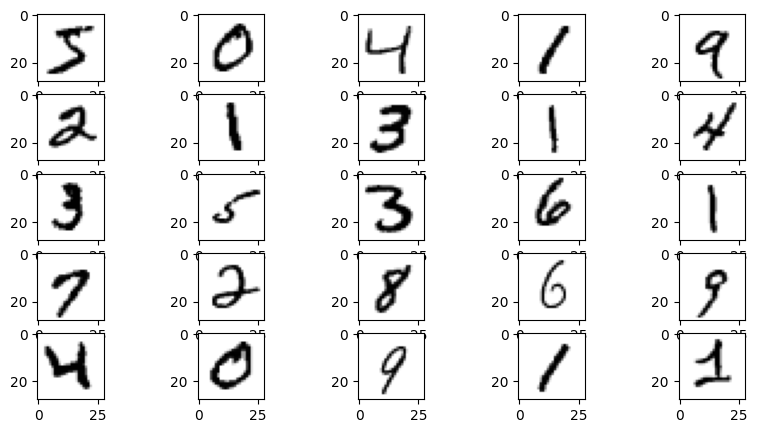

In [7]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

#### data standardisation

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [9]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
X_train.ndim  # tensor dimension

3

In [11]:
X_train.shape

(60000, 28, 28)

#### model building

In [12]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','recall','precision'])

In [14]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8527 - loss: 0.5129 - precision: 0.9357 - recall: 0.7626 - val_accuracy: 0.9560 - val_loss: 0.1563 - val_precision: 0.9670 - val_recall: 0.9466
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9630 - loss: 0.1295 - precision: 0.9708 - recall: 0.9553 - val_accuracy: 0.9674 - val_loss: 0.1116 - val_precision: 0.9737 - val_recall: 0.9622
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9765 - loss: 0.0813 - precision: 0.9814 - recall: 0.9722 - val_accuracy: 0.9681 - val_loss: 0.1023 - val_precision: 0.9733 - val_recall: 0.9644
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9835 - loss: 0.0576 - precision: 0.9867 - recall: 0.9809 - val_accuracy: 0.9748 - val_loss: 0.0822 - val_precision: 0.9779 - val_recall: 0.9720
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9887 - loss: 0.0397 - precision: 0.9910 - recall: 0.9867 - val_accuracy: 0.9767 - val_loss: 0.

#### predict

In [15]:
y_pred_cat = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### decode predicted labels

In [16]:
y_pred = np.argmax(y_pred_cat, axis=1)

#### model evaluation

In [17]:
def print_metrics(y_test,y_pred):
    rec = recall_score(y_test, y_pred,average='weighted')
    pr = precision_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    acc = accuracy_score(y_test, y_pred)
    print(f"Recall score {rec}")
    print(f"Precision score {pr}")
    print(f"f1 score {f1}")
    print(f"Accuracy score {acc}")
    print(f"Classification report \n{classification_report(y_test, y_pred)}")
    return rec,pr,f1,acc

In [18]:
metrics_lr = print_metrics(y_test, y_pred)

Recall score 0.9803
Precision score 0.9803788366719848
f1 score 0.9803060943835838
Accuracy score 0.9803
Classification report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### confusion matrix

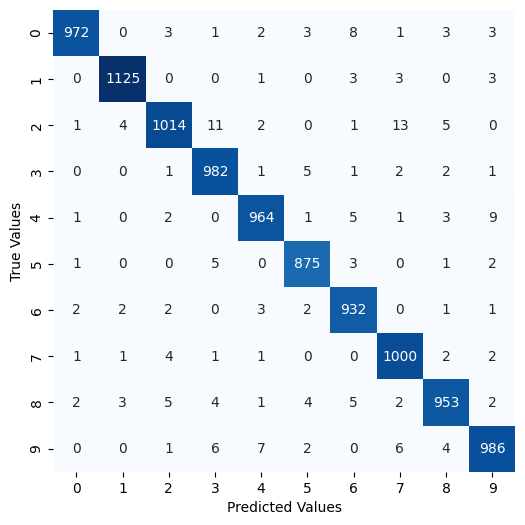

In [19]:
fig = plt.figure(figsize=(6, 6))

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

#### predict and show several items

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
True value:  7


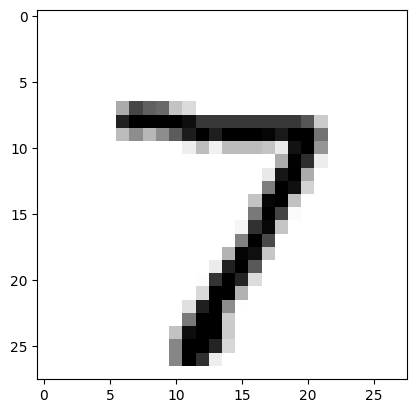

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True value:  2


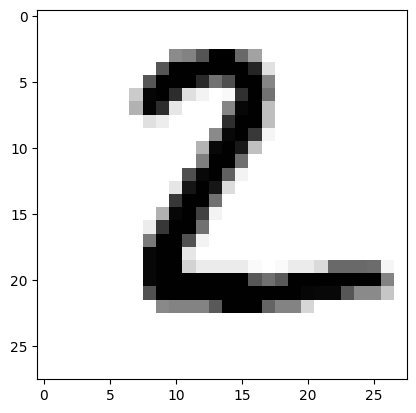

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
True value:  1


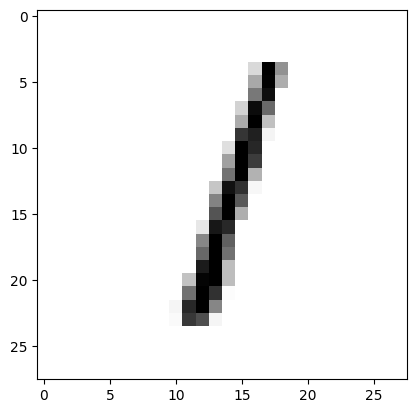

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True value:  0


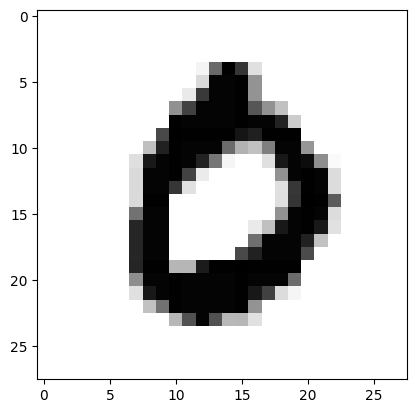

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
True value:  4


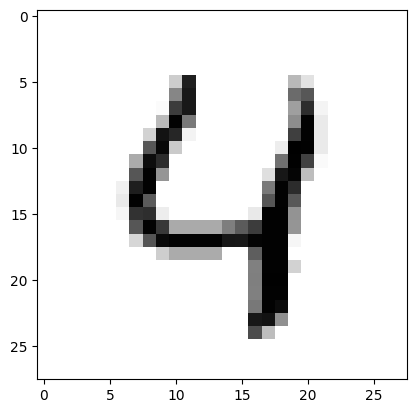

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
True value:  1


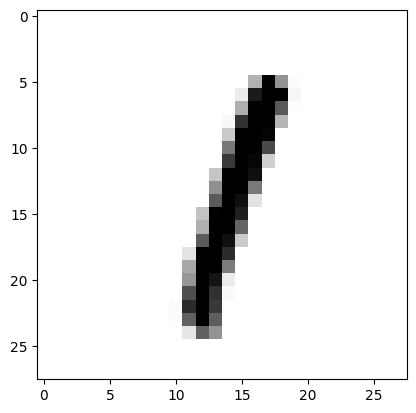

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True value:  4


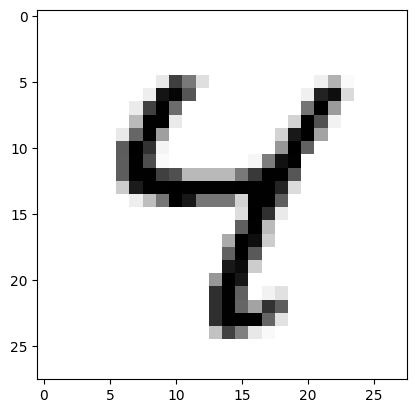

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True value:  9


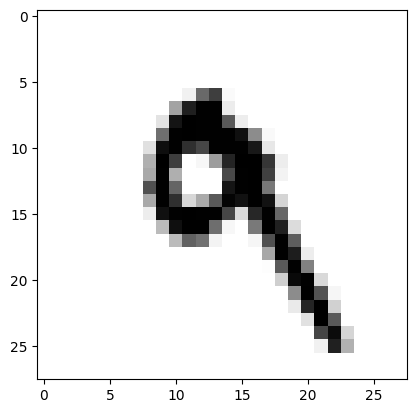

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True value:  5


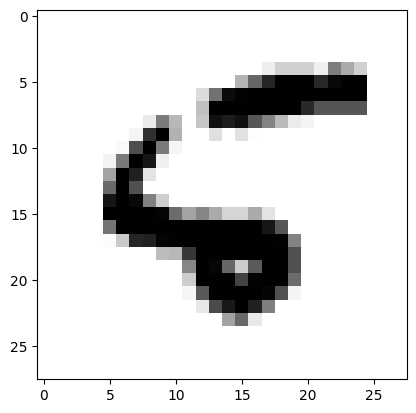

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True value:  9


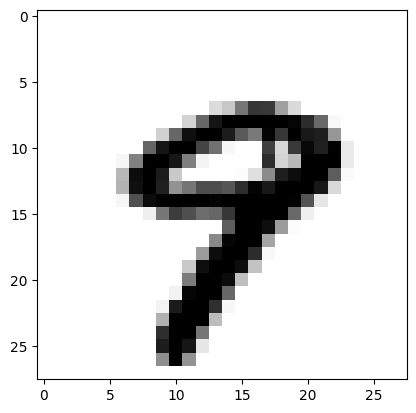

In [20]:
for i in range(10):
    res = model.predict(X_test[i].reshape(1,28,28))
    print('True value: ',np.argmax(res))
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.show()
    print('=========================================================')